<a href="https://colab.research.google.com/github/Timoha-3000/1st_CUDA_Lab/blob/master/lab_1_AMRPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 1
## Упражнение 1

In [39]:
print("Hello world!")

Hello world!


## Упражнение 2


In [40]:
import time
time.sleep(5)

## Упражнение 3


In [41]:
def say_hello(recip):
  return 'Hello, {}!'.format(recip)
say_hello('Tim!')

'Hello, Tim!!'

## Упражнение 4


попробовал все горячие клавиши из лабораторной работы

## Упражнение 5


## Ввожу какой-то текст
1. чтобы сдать лабу
2. чтобы получить баллы
* чтобы получить много много баллов
* __ссылка__ на _мой ОРИОКС_ [myOrioksYo!](https://orioks.miet.ru/student/student)
* ну и картиночку мою тоже надо ![крутяцкая картиночка](https://avatars.mds.yandex.net/i?id=a7c77a11f691187dbe9b3eb51d1313b7_l-5352698-images-thumbs&n=13.png)


## Упражнение 6


In [42]:
import numpy as np
def square(x):
  return x*x

In [43]:
x=np.random.randint(1,10)
y=square(x)
print('%d square is %d' % (x,y))

3 square is 9


In [44]:
print('%d square is %d' % (x,y))
y=15

3 square is 9


## Упражнение 7


### Грузим библиотеки и генерим данные

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Генерация данных
x = np.linspace(0, 10, 100)
y = np.sin(x)
y2 = np.cos(x)
z = np.random.rand(100)
categories = ['A', 'B', 'C', 'D']
values = [3, 7, 8, 5]
data = np.random.randn(1000)

### Строим графики разных видов:

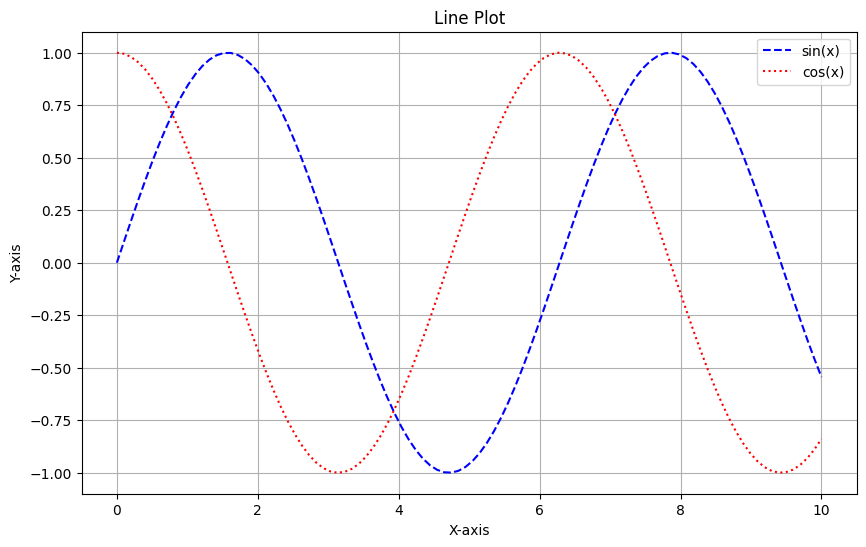

In [46]:
# 1. Линейный график
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='sin(x)', linestyle='--', color='b')
plt.plot(x, y2, label='cos(x)', linestyle=':', color='r')
plt.title("Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()

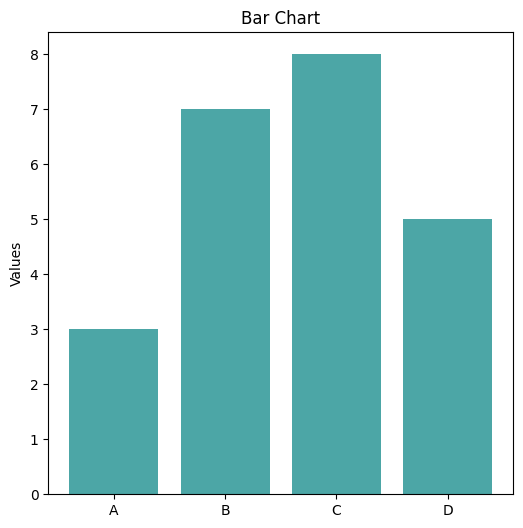

In [47]:
# 2. Столбчатая диаграмма
plt.figure(figsize=(6, 6))
plt.bar(categories, values, color='teal', alpha=0.7)
plt.title("Bar Chart")
plt.ylabel("Values")
plt.show()

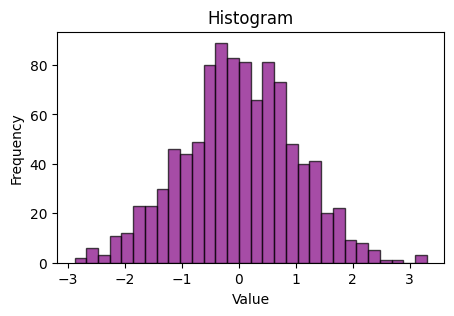

In [48]:
# 3. Гистограмма
plt.figure(figsize=(5, 3))
plt.hist(data, bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

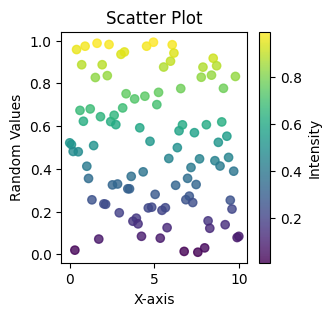

In [49]:
# 4. Диаграмма рассеяния
plt.figure(figsize=(3, 3))
plt.scatter(x, z, c=z, cmap='viridis', alpha=0.8)
plt.colorbar(label='Intensity')
plt.title("Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Random Values")
plt.show()

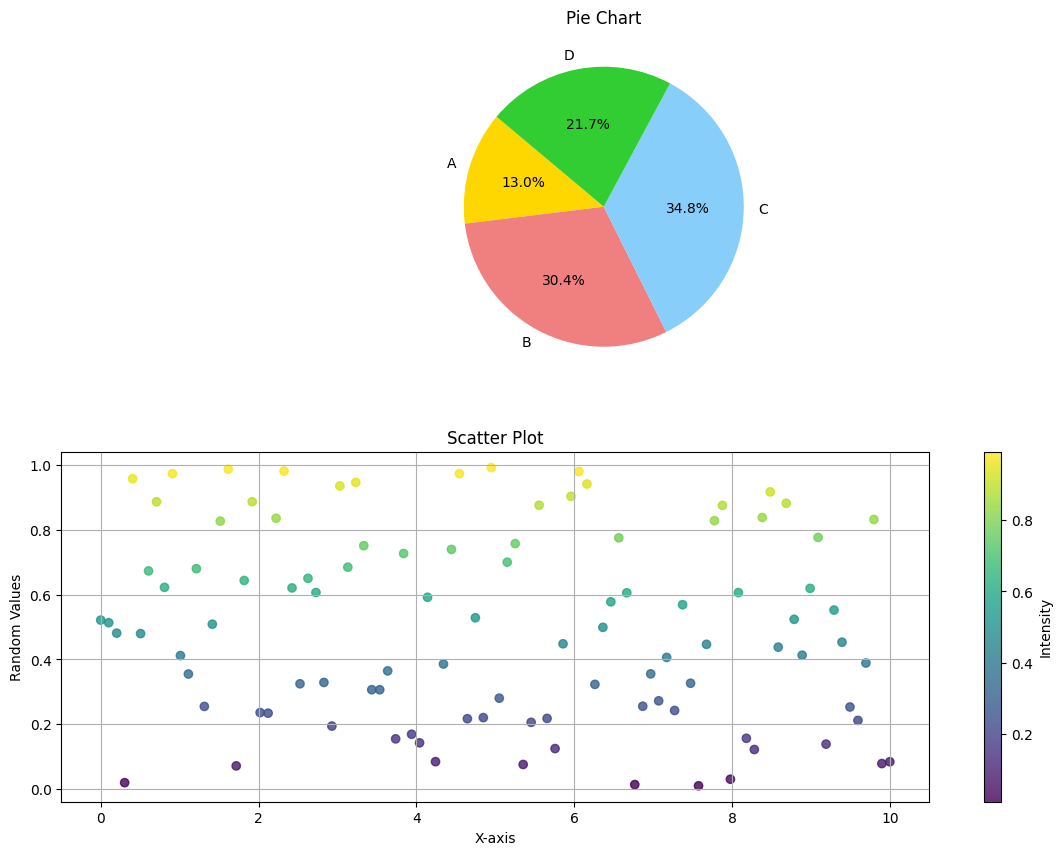

In [50]:
# 5. Диаграмма рассеяния и круговая
fig = plt.figure(figsize=(14, 10))

plt.subplot(2,1,1)
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightskyblue', 'limegreen'])
plt.title("Pie Chart")

plt.subplot(2,1,2)
plt.scatter(x, z, c=z, cmap='viridis', alpha=0.8)
plt.colorbar(label='Intensity')
plt.title("Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Random Values")
plt.grid(True)
plt.show()

## Задание к лабораторной работе


подключим ряд библиотек:

In [51]:
import pandas as pd
from scipy.special import factorial
from math import log2, log

создадим структуры для простоты взаимодействия:

In [52]:
time_limits = {
    "Секунда": 1e6,
    "Минута": 60 * 1e6,
    "Час": 3600 * 1e6,
    "День": 24 * 3600 * 1e6,
    "Месяц": 30 * 24 * 3600 * 1e6,
    "Год": 365 * 24 * 3600 * 1e6,
    "Век": 100 * 365 * 24 * 3600 * 1e6
}

functions = {
    "log(n)": lambda n: np.log2(n),
    "n": lambda n: n,
    "n * log(n)": lambda n: n * np.log2(n),
    "n^2": lambda n: n**2,
    "n^3": lambda n: n**3,
    "2^n": lambda n: 2**n,
    "n!": lambda n: factorial(n, exact=False)
}

# Подбор максимального n с учетом ограничений для каждой функции
_(обработка функций, которые быстро превышают ограничения, такие как n! и 2^n, производится по с ограничением)_

In [54]:
results = {func: [] for func in functions}
max_n = 1000

for label, time_limit in time_limits.items():
    for func_name, func in functions.items():
        max_n_found = None
        for n in range(1, max_n):
            if func(n) > time_limit:
                max_n_found = n - 1
                break
        if max_n_found is None:
            max_n_found = max_n  # Устанавливаем max_n, если не было найдено превышения
        results[func_name].append(max_n_found)

Создание таблицы значений

In [55]:
df = pd.DataFrame(results, index=time_limits.keys())
df.index.name = "Time Limit"
df

,log(n),n,n * log(n),n^2,n^3,2^n,n!
Time Limit,,,,,,,
Секунда,1000,1000,1000,1000,100,19,9
Минута,1000,1000,1000,1000,391,25,11
Час,1000,1000,1000,1000,1000,31,12
День,1000,1000,1000,1000,1000,36,13
Месяц,1000,1000,1000,1000,1000,41,15
Год,1000,1000,1000,1000,1000,44,16
Век,1000,1000,1000,1000,1000,51,17


# Построение графиков функций

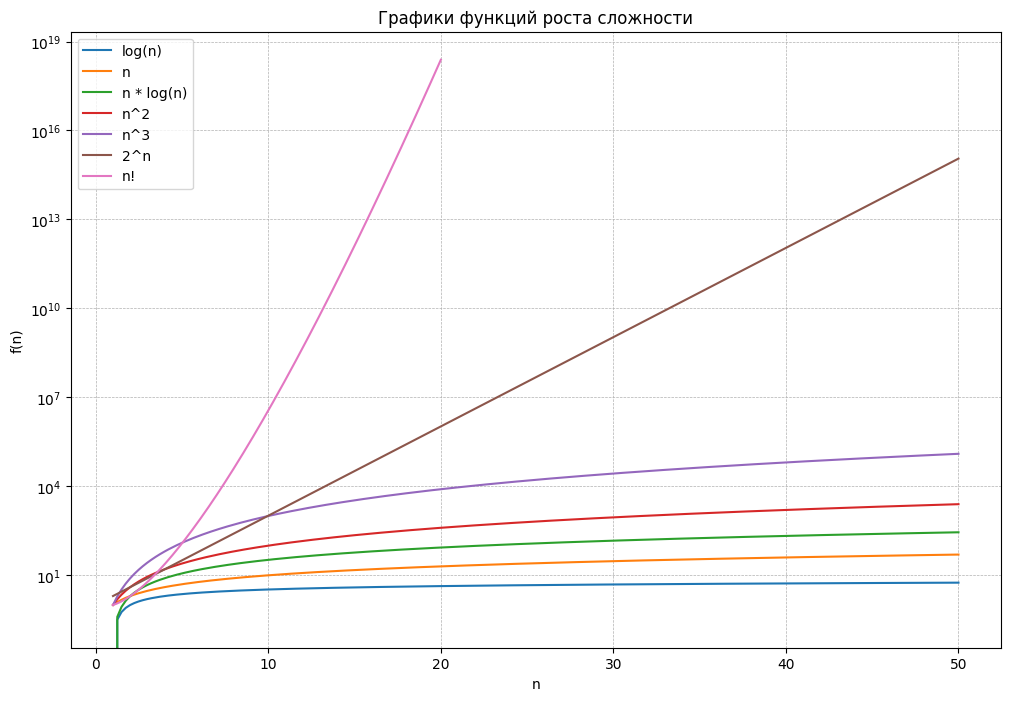

In [56]:
n_values = np.linspace(1, 50, 200)

plt.figure(figsize=(12, 8))

for func_name, func in functions.items():
    if func_name == "n!":  # Ограничение для факториала
        n_values_plot = np.linspace(1, 20, 200)
    elif func_name == "2^n":  # Ограничение для экспоненциального роста
        n_values_plot = np.linspace(1, 50, 200)
    else:
        n_values_plot = n_values
    plt.plot(n_values_plot, func(n_values_plot), label=func_name)

plt.yscale('log')
plt.xlabel('n')
plt.ylabel('f(n)')
plt.title('Графики функций роста сложности')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()